# Analyzing wildfire activities in Australia

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(URL)

In [5]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [6]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [9]:
# exporting date
import datetime as dt
# making a new year column
df['Year'] = pd.to_datetime(df['Date']).dt.year
# making a new month column
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [11]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

### Change in avg estimated fire area over time

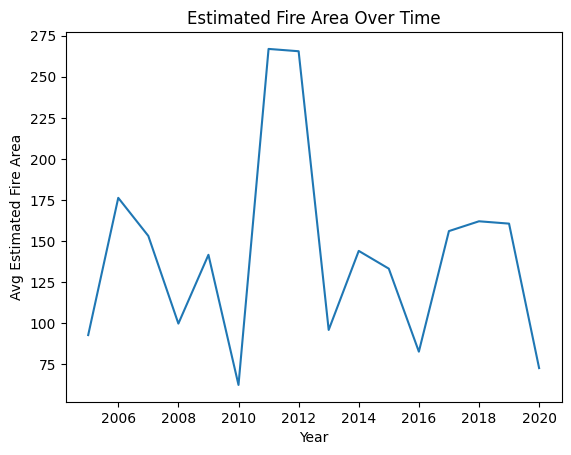

In [12]:
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
df_new.plot(x = df_new.index, y = df_new.values)
plt.xlabel('Year')
plt.ylabel('Avg Estimated Fire Area')
plt.title('Estimated Fire Area Over Time')
plt.show()

### Estimated fire area for year grouped together with month

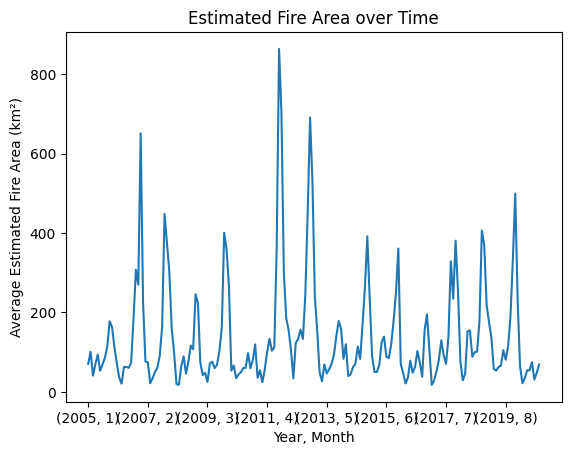

In [14]:
df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

### Distribution of mean estimated fire brightness across the regions

In [15]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

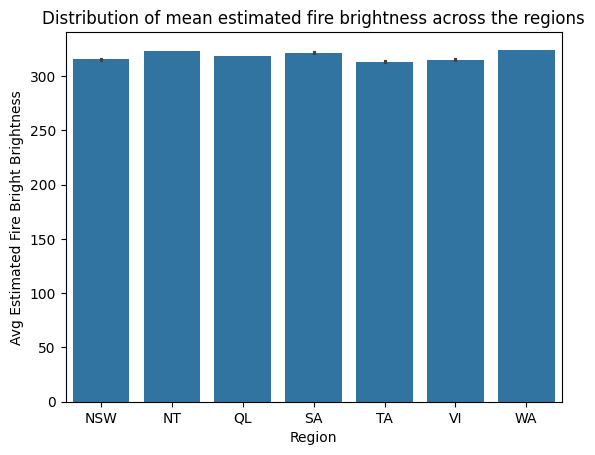

In [17]:
sns.barplot(x = 'Region', y = 'Mean_estimated_fire_brightness', data=df)
plt.xlabel('Region')
plt.ylabel('Avg Estimated Fire Bright Brightness')
plt.title('Distribution of mean estimated fire brightness across the regions')
plt.show()

### Percentage of Pixels for Presumed Vegetation Fires by Region

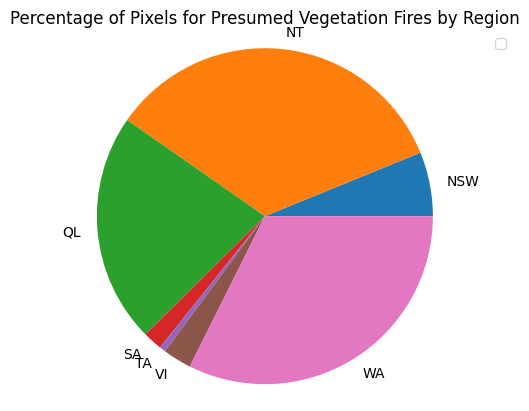

In [24]:
region_count = df.groupby('Region')['Count'].sum()
plt.pie(region_count, labels=region_count.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend((i,round(k/region_count.sum()*100,2)) for i,k in zip(region_count.index, region_count))
plt.axis('equal')
plt.show()

### Histogram of Mean Estimated Fire Brightness

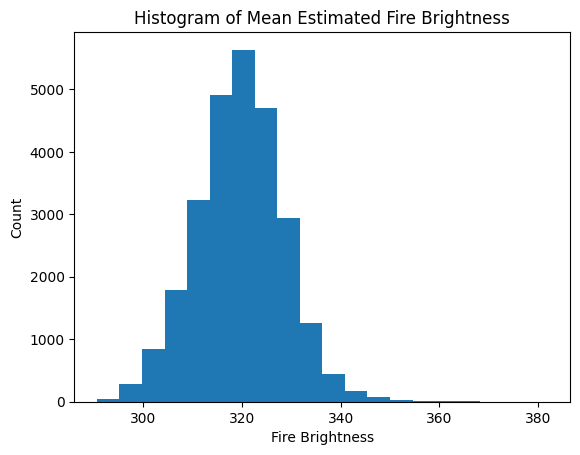

In [25]:
plt.hist(x = df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Fire Brightness')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

### Mean Estimated Fire Radiative Power v/s Mean Confidence

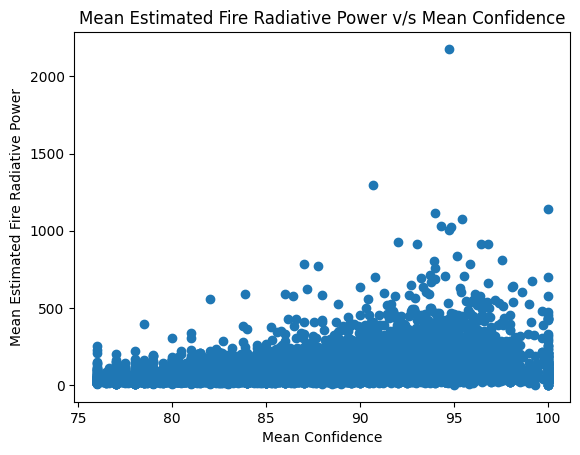

In [27]:
plt.scatter(y='Mean_estimated_fire_radiative_power', x='Mean_confidence', data=df)
plt.ylabel('Mean Estimated Fire Radiative Power')
plt.xlabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power v/s Mean Confidence')
plt.show()